In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import pandas as pd
sys.path.insert(0, "../src")
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from os.path import join as oj
import configparser
import os
pd.set_option('display.float_format', lambda x: '%.2f' % x)

config = configparser.ConfigParser()
config.read('../config.ini');
data_path =config['DATASET']['data_path'] 
from torch.nn import functional as F

In [2]:
fnames = sorted([oj(config['PATHS']['model_path'] , fname) for fname in os.listdir(config['PATHS']['model_path'] ) if "pkl" in fname]) 
results_list = [pd.Series(pkl.load(open(fname, "rb"))) for fname in (fnames)] 

results = pd.concat(results_list, axis=1).T.infer_objects()

results.experiment_name.unique()
results['best_val_score'] = [max(x) for x in results.val_scores]
results[['foldername',  'final_dice_score','cost_function', 'add_ratio','experiment_name']].groupby([ 'experiment_name','foldername','add_ratio',  'cost_function']).mean()

final_dice_score
experiment_name      foldername   add_ratio cost_function                  
BNoActiveLearning    lno_halfHour 0.00      random_cost                0.88
EActiveLearning      lno_halfHour 0.02      cut_off_cost               0.97
                                            random_cost                0.95
EFullDatasetTraining lno          0.00      random_cost                0.96
ENoActiveLearning    lno_halfHour 0.00      random_cost                0.95
FFullDatasetTraining lno          0.00      random_cost                0.96
FNoActiveLearning    lno_halfHour 0.00      random_cost                0.94
FullDatasetTraining  lno          0.00      random_cost                0.96
NoActiveLearning     lno_halfHour 0.00      random_cost                0.94

In [3]:
test_results = results[results.experiment_name == '01Aquisition'][results.cost_function == 'random_cost']
test_results

C:\Users\lauri\AppData\Local\Temp\ipykernel_28012\1383974888.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_results = results[results.experiment_name == '01Aquisition'][results.cost_function == 'random_cost']


,file_name,epochs,batch_size,cost_function,add_ratio,foldername,poolname,experiment_name,lr,image_size,...,num_batches,class_dict,data_min,data_max,val_scores,train_losses,num_classes,final_dice_score,test_dice_score,best_val_score


IndexError: index 0 is out of bounds for axis 0 with size 0

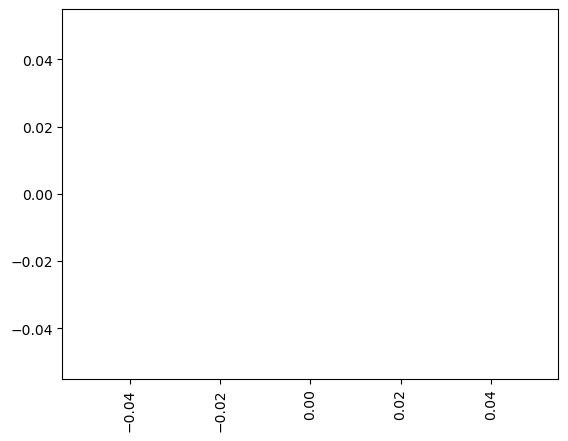

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data into a pandas DataFrame
# df = pd.read_csv("your_data.csv")

# Group the data by experiment name
show_results = results[results.experiment_name == "RealValBaselineNoAquisition"]
grouped = show_results.groupby("cost_function")

# Calculate the mean and standard deviation for each group
means = grouped.final_dice_score.mean()
stds = grouped.final_dice_score.std()

# Plot the data as a bar chart
means.plot(kind="bar", yerr=stds, capsize=5)

# Add axis labels and a title
plt.xlabel("Experiment Name")
plt.ylabel("Value")
plt.title("Summary of Results by Experiment Name")

# Show the plot
plt.show()

In [5]:
results[['experiment_name', 'file_name',  'cost_function',]]

,experiment_name,file_name,cost_function
0,BNoActiveLearning,0336286026,random_cost
1,NoActiveLearning,0701870797,random_cost
2,EFullDatasetTraining,0895983955,random_cost
3,EActiveLearning,0955970804,cut_off_cost
4,FullDatasetTraining,1143151672,random_cost
5,EActiveLearning,2248906188,random_cost
6,FNoActiveLearning,2430118754,random_cost
7,EFullDatasetTraining,2681993183,random_cost
8,FFullDatasetTraining,3611342877,random_cost
9,EActiveLearning,4136471995,random_cost


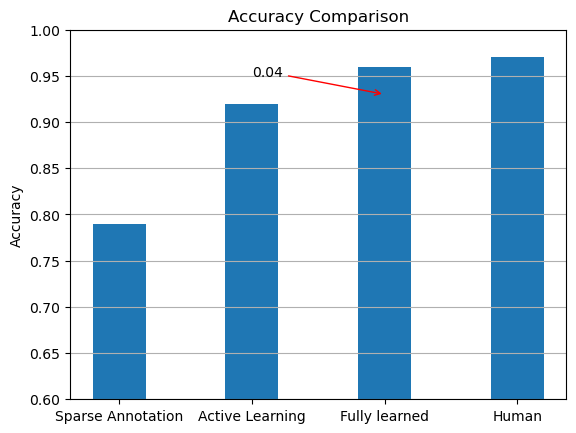

In [8]:
# import matplotlib.pyplot as plt
# #xxx change
# # results_dict = {"Sparse Annotation": 1.0,  "Active Learning": 1.0, "Fully learned": 1.0, 'Human' : 1.0, }

# fig, ax = plt.subplots()
# ax.bar(results_dict.keys(), results_dict.values(), width=0.4, align='center')
# ax.set_ylim([0.6, 1])
# ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy Comparison')
# ax.grid(True, which='both', axis='y')

# # Highlight the small difference between Active Learning and Fully learned
# ax.annotate(f'{results_dict["Fully learned"] - results_dict["Active Learning"]:.2f}',
#             xy=("Fully learned", results_dict["Fully learned"] - 0.03), 
#             xytext=("Active Learning", results_dict["Active Learning"] + 0.03),
#             arrowprops={'arrowstyle': '->', 'color': 'red'})

# plt.show()